In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [5]:
data=pd.read_csv("/home/rrvc/machine_learining_practice/ML Training Class-2/column_2C_weka.csv")

In [6]:
data.head()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal

In [7]:
dir(sklearn)

['_ASSUME_FINITE',
 '__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__check_build',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '__version__',
 '_contextmanager',
 'base',
 'clone',
 'config_context',
 'exceptions',
 'externals',
 'get_config',
 'logger',
 'logging',
 'os',
 're',
 'set_config',
 'setup_module',
 'sys',
 'utils',
 'warnings']

In [8]:
sklearn.__version__

'0.19.1'

In [9]:
sklearn.grid_search()

AttributeError: 'module' object has no attribute 'grid_search'

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
dir(KNeighborsClassifier)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_fit',
 '_get_param_names',
 '_init_params',
 '_pairwise',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'predict',
 'predict_proba',
 'score',
 'set_params']

In [12]:
data.info() #summary of how data structured in csv 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [13]:
data.describe() # give all the possible mean, std, min etc

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
count        310.000000           310.000000             310.000000   
mean          60.496653            17.542822              51.930930   
std           17.236520            10.008330              18.554064   
min           26.147921            -6.554948              14.000000   
25%           46.430294            10.667069              37.000000   
50%           58.691038            16.357689              49.562398   
75%           72.877696            22.120395              63.000000   
max          129.834041            49.431864             125.742385   

       sacral_slope  pelvic_radius  degree_spondylolisthesis  
count    310.000000     310.000000                310.000000  
mean      42.953831     117.920655                 26.296694  
std       13.423102      13.317377                 37.559027  
min       13.366931      70.082575                -11.058179  
25%       33.347122     110.709196                  1.603727  
50%       42.404912     118.268178                 11.767934  
75%       52.695888     125.467674                 41.287352  
max      121.429566     163.071041                418.543082

In [15]:
color_list = ["red" if i=="Abnormal" else "green" for i in data.loc[:, "class"]]
print(data.columns)
# A scatterplot shows the relationship between two variables as dots in two dimensions, 
# one axis for each attribute. You can create a scatterplot for each pair of attributes in your data. 
# Drawing all these scatterplots together is called a scatterplot matrix.
pd.plotting.scatter_matrix(data.loc[:, data.columns != "class"], 
                          c=color_list, 
                          figsize=[15,15],
                          diagonal="hist",
                          alpha=0.5,
                          s=200,
                          marker=".", # representaion of dots 
                          edgecolor="black")
plt.show()

Index([u'pelvic_incidence', u'pelvic_tilt numeric', u'lumbar_lordosis_angle',
       u'sacral_slope', u'pelvic_radius', u'degree_spondylolisthesis',
       u'class'],
      dtype='object')


In [32]:
sns.countplot(x="class", data=data)
data.loc[:, "class"].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3) # initialize the model 
x, y = data.loc[:, data.columns != "class"], data.loc[:, "class"]
knn.fit(x, y) # training the model 
prediction = knn.predict(x) # predictin on the same dataset on which the modeel was made 
print("Prediction: {}".format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [43]:
from sklearn.model_selection import train_test_split
x, y = data.loc[:, data.columns != "class"], data.loc[:, "class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # randome_state as seed so 
                                                                                         # that next time we get 
                                                                                        # same random combination 
knn = KNeighborsClassifier(n_neighbors =3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("with LNN (K=3) accuracy is:", knn.score(x_test, y_test) ) 

with LNN (K=3) accuracy is: 0.8602150537634409


In [55]:
# model complexity 
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# loop over diffrent values of k

for i, k in enumerate(neig):
    # k from 1 to 25 (exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # train_accuracy 
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy 
    test_accuracy.append(knn.score(x_test,y_test))
    
#plot
plt.figure(figsize=[13, 8])
plt.plot(neig, test_accuracy, label="Test Accuracy")
plt.plot(neig, train_accuracy, label="Training Accuracy")
plt.legend()
plt.title("K value VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with k={}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.8817204301075269 with k=18


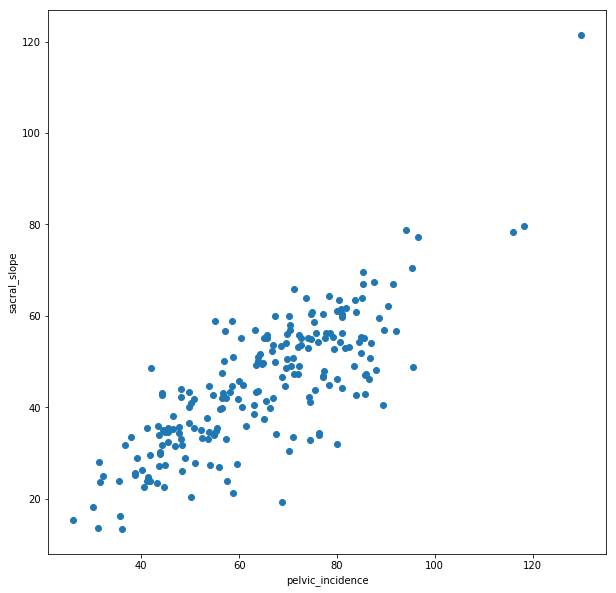

In [65]:
#Regression practice-

# create data1 that include pelvic_incident 
data1 = data[data["class"]=="Abnormal"]
x= np.array(data1.loc[:, "pelvic_incidence"]).reshape(-1, 1)
y = np.array(data1.loc[:, "sacral_slope"]).reshape(-1, 1)
# scatter 
plt.figure(figsize=[10, 10])
plt.scatter(x=x, y=y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()


In [70]:
# LinearRegression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space 
predict_space = np.linspace(min(x), max(x)).reshape(-1, 1)

# fit 
reg.fit(x, y)
# predict 
predicted = reg.predict(predict_space)
# R*2
print("R^2 score", reg.score(x, y))
# plot regression line and scatter 
plt.plot(predict_space, predicted, color="black", linewidth=3)
plt.scatter(x=x, y=y)
plt.xlabel("pelvic_incedence")
plt.ylabel("sacral_slope")
plt.show()

# note the treat the 

R^2 score 0.6458410481075871


In [72]:
# k fold cross validation 
from sklearn.model_selection import cross_val_score 
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg, x, y, cv=k) # use r^2 as score 
print("Cv Score:", cv_result)
print("Cv cores average:", np.sum(cv_result)/k) # mean is taken as dependent varaible is continous 
                                                # r^2 should be greater then 50% 


Cv Score: [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
Cv cores average: 0.39314625028848676


In [91]:
# Penalized models- penslise the coefficient of the features 
# overfitting 
# Ridge- Performs L2 reulaization, i.e adds penelty equivalant to square of the coefficent 
from sklearn.linear_model import Ridge 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.3)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)
print("Ridge score", ridge.score(x_test, y_test))

Ridge score 0.5608287918841997


In [94]:
# Lasso - Performs L! Regulaization i.e adds penality equivalent to absolute value 
# Lest Abosukt Shrnkage Selector Operator 

from sklearn.linear_model import Lasso 
print(data1.columns)
x= np.array(data1.loc[:,  ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
        'pelvic_radius']])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 3, test_size=0.3)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(x_train, y_train)
ridge_predict = lasso.predict(x_test)
print("Lasso score:", lasso.score(x_test, y_test))
print("Lasso coefficient", lasso.coef_)

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')
Lasso score: 0.9640334804327547
Lasso coefficient [ 0.82498243 -0.7209057   0.         -0.        ]


In [106]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
x, y = data.loc[:, data.columns != "class"], data.loc[:, data.columns == "class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
rf = RandomForestClassifier(random_state = 4 )
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n ", cm )
print("Classification report:\n", classification_report(y_test, y_pred))


Confusion matrix:
  [[58  8]
 [ 7 20]]
Classification report:
              precision    recall  f1-score   support

   Abnormal       0.89      0.88      0.89        66
     Normal       0.71      0.74      0.73        27

avg / total       0.84      0.84      0.84        93



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [107]:
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


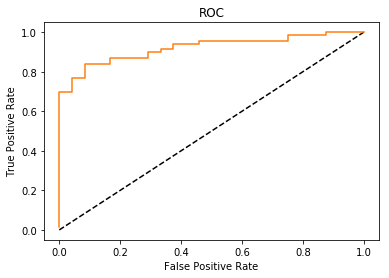

In [139]:
# ROc curve 
from sklearn.metrics import roc_curve 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report
# abnormal =1  and normal - 0 
data["class_binary"] =  [ 1 if i== "Abnormal" else 0 for i in data.loc[:, "class"]]
x, y = data.loc[:, (data.columns != 'class') & (data.columns != "class_binary")], data.loc[:, data.columns=="class_binary"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
# Plot ROC curve 
plt.plot(0, 1, [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

In [140]:
# grid search cross validation with i hyper parameter 
from sklearn.model_selection import GridSearchCV
grid = {"n_neighbors": np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCv
knn_cv.fit(x, y) # fit


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [142]:
# print hyperparameter 
print("Tuned hyperparameterk: {}".format(knn_cv.best_params_))
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameterk: {'n_neighbors': 4}
Best score: 0.7548387096774194


In [149]:
# grid search cross validation with 2 hyperparameter 
# 1 . hyperparameter is C: logistic regression regularization  parameter 
# 2. penalty L1, L2
# hyoperparameter grid 
param_grid = {"C": np.logspace(-3, 3, 7), "penalty":["l1", "l2"]} # 1/lambsa
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=3)
logreg_cv.fit(x_train, y_train)


# print the optimala parameter and best score 
print("Tuned hyperparameter: {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameter: {'C': 100.0, 'penalty': 'l2'}
Best Accuracy: 0.8525345622119815


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [159]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 

steps = [("scalar", StandardScaler()), ("SVM", SVC())]

pipeline = Pipeline(steps)
parameters = {"SVM__C":[1,10,100],
              "SVM__gamma": [0.1, 0.01]}

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)

cv.fit(x_train, y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tunes Mode Parameters: {}".format(cv.best_params_))

              

Accuracy: 0.8548387096774194
Tunes Mode Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [162]:
# unsupervised learingin 

# as you can see there is no labels in data 

data = pd.read_csv("C:/Users/ADMIN1/Downloads/ML Training Class-2/column_2C_weka.csv")
print(data.columns)
plt.scatter(data["pelvic_radius"], data["degree_spondylolisthesis"])
plt.xlabel("pelvic_radius")
plt.ylabel("degree_spondylolisthesis")
plt.show()

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')


In [174]:

# KMean cluster 
data2 =  data.loc[:, [ 'degree_spondylolisthesis', 'pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data["pelvic_radius"],data["degree_spondylolisthesis"], c=labels )
plt.xlabel("pelvic_radus")
plt.xlabel("degree_spondylolisthesis")
plt.show()

In [177]:
# cross tabulation table 
df =  pd.DataFrame({"labels": labels, "class":data["class"]})
ct = pd.crosstab(df["labels"], df["class"])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0
